In [15]:
import torch
import torch.nn as nn
import torchvision.transforms as transforms
from torch.autograd import Variable
import pandas as pd
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt

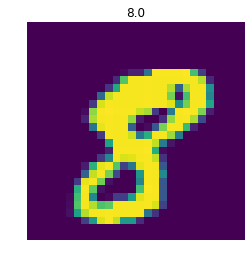

In [53]:
#Dataset Prepare
#load data
train = pd.read_csv("train.csv",dtype = np.float32)
test_img = pd.read_csv("test.csv",dtype = np.float32)
#split data into features(pixels) and labels(0-9)
labels_numpy = train.label.values
features_numpy = train.loc[:,train.columns != "label"].values/255 #normalization

#split data into test,train.
features_train, features_test, targets_train, targets_test = train_test_split(features_numpy, labels_numpy,test_size = 0.2,random_state = 42)

#create features and target tensor for training set.
featuresTrain = torch.from_numpy(features_train)
targetsTrain = torch.from_numpy(targets_train).type(torch.LongTensor)

#create features and target tensor for testing set.
featuresTest = torch.from_numpy(features_test)
targetsTest = torch.from_numpy(targets_test).type(torch.LongTensor)

#batch_size, epoch and iteration
batch_size = 100
n_iters = 30000
num_epochs = n_iters / ((len(features_train)) / batch_size)
num_epochs = int(num_epochs)

#pytorch train and test sets
train = torch.utils.data.TensorDataset(featuresTrain,targetsTrain)
test = torch.utils.data.TensorDataset(featuresTest,targetsTest)

#data loader
train_loader = torch.utils.data.DataLoader(train,batch_size=batch_size,shuffle=False)
test_loader = torch.utils.data.DataLoader(test,batch_size=batch_size,shuffle=False)

#See one of the images
plt.imshow(features_numpy[10].reshape(28,28))
plt.axis("off")
plt.title(str(labels_numpy[10]))
plt.savefig('graph.png')
plt.show()





In [54]:
#Using ANN
class ANNModel(nn.Module):
    def __init__(self, input_dim,hidden_dim,output_dim):
        super(ANNModel, self).__init__()
        #Linear1:784 --> 100
        self.fc1 = nn.Linear(input_dim,hidden_dim)
        #Non-Linear 1
        self.relu1 = nn.ReLU()
        
        #Linear2:100 --> 100
        self.fc2 = nn.Linear(hidden_dim,hidden_dim)
        #Non-Linear 2
        self.tanh2 = nn.Tanh()
        
        #Lin3:100 --> 100
        self.fc3 = nn.Linear(hidden_dim,hidden_dim)
        #Non-Linear3
        self.elu3 = nn.ELU()
        
        #lin4 output layer: 100 -- > 10
        self.fc4 = nn.Linear(hidden_dim,output_dim)
    def forward(self,x):
        #lin1
        out = self.fc1(x)
        #non-Linear1
        out = self.relu1(out)
        
        #lin2
        out = self.fc2(out)
        out = self.tanh2(out)
        
        #l3
        out = self.fc3(out)
        out = self.elu3(out)
        
        #l4
        out = self.fc4(out)
        return out
    
#ANN parameters
input_dim = 28*28
hidden_dim = 150 #hyper
output_dim = 10

#implement ANN
model = ANNModel(input_dim, hidden_dim, output_dim)

#GPU
#model.cuda()
#Cross Entropy Loss
error = nn.CrossEntropyLoss()

#SGD Optimizer
learning_rate = 0.02
optimizer = torch.optim.SGD(model.parameters(), lr = learning_rate)

In [55]:
#ANN model Training
count = 0
loss_list=[]
iteration_list = []
accuracy_list = []
for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader):
        
        train = Variable(images.view(-1,28*28))
        labels = Variable(labels)
        
        #Clear gradients
        optimizer.zero_grad()
        
        #Forward Propagation
        outputs = model(train)
        
        #Calculate softmax and cross entropy loss
        loss = error(outputs,labels)
        
        #Calculate gradients
        loss.backward()
        
        #update parameters
        optimizer.step()
        
        count+=1
        
        if count % 50 == 0:
            #Accuracy
            correct = 0
            total = 0
            #Predict test dataset
            for images, labels in test_loader:
                
                test = Variable(images.view(-1,28*28))
                
                #forward
                outputs = model(test)
                
                
                #Get prediction from max. val
                predicted = torch.max(outputs.data,1)[1]
                #GPU!!!!
                #predicted = torch.max(outputs.data,1)[1]
                #total number of labels
                total += len(labels)
                #total correct predictions
                correct += (predicted == labels).sum()
            accuracy = float(100 * correct / float(total))
            #store loss and iteration
            loss_list.append(loss.data)
            iteration_list.append(count)
            accuracy_list.append(accuracy)
            if count % 500 == 0:
                #print loss
                print('Iteration: {} Loss: {} Accuracy: {} %'.format(count,loss.data,accuracy))

Iteration: 500 Loss: 0.7672784924507141 Accuracy: 77.0 %
Iteration: 1000 Loss: 0.48778247833251953 Accuracy: 86.0 %
Iteration: 1500 Loss: 0.24445506930351257 Accuracy: 89.0 %
Iteration: 2000 Loss: 0.3037043809890747 Accuracy: 90.0 %
Iteration: 2500 Loss: 0.29880622029304504 Accuracy: 91.0 %
Iteration: 3000 Loss: 0.12172821164131165 Accuracy: 92.0 %
Iteration: 3500 Loss: 0.22102780640125275 Accuracy: 93.0 %
Iteration: 4000 Loss: 0.06700796633958817 Accuracy: 94.0 %
Iteration: 4500 Loss: 0.288056343793869 Accuracy: 94.0 %
Iteration: 5000 Loss: 0.09658544510602951 Accuracy: 94.0 %
Iteration: 5500 Loss: 0.18446284532546997 Accuracy: 94.0 %
Iteration: 6000 Loss: 0.17441266775131226 Accuracy: 95.0 %
Iteration: 6500 Loss: 0.08498352020978928 Accuracy: 95.0 %
Iteration: 7000 Loss: 0.11041808873414993 Accuracy: 95.0 %
Iteration: 7500 Loss: 0.12350364029407501 Accuracy: 95.0 %
Iteration: 8000 Loss: 0.17332248389720917 Accuracy: 95.0 %
Iteration: 8500 Loss: 0.04630681127309799 Accuracy: 96.0 %
It

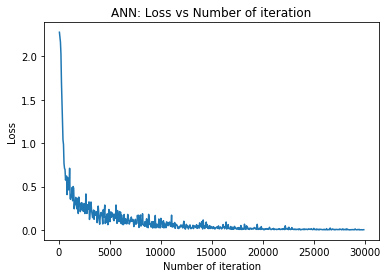

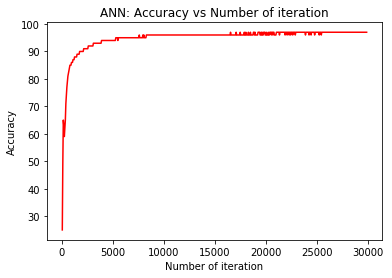

In [56]:
plt.plot(iteration_list,loss_list)
plt.xlabel("Number of iteration")
plt.ylabel("Loss")
plt.title("ANN: Loss vs Number of iteration")
plt.show()

# visualization accuracy 
plt.plot(iteration_list,accuracy_list,color = "red")
plt.xlabel("Number of iteration")
plt.ylabel("Accuracy")
plt.title("ANN: Accuracy vs Number of iteration")
plt.show()

In [67]:
test_img = np.array(test_img)
test_ts = torch.from_numpy(test_img)

In [100]:
out = model(test_ts)
submit = torch.max(out.data,1)[1]

In [101]:
submit = submit.numpy()

In [102]:
submit.shape

(28000,)

In [93]:
index = np.arange(1,28001)

In [94]:
index

array([    1,     2,     3, ..., 27998, 27999, 28000])

In [95]:
index = pd.DataFrame(index)

In [103]:
submit = pd.DataFrame(submit)

In [106]:
submit.to_csv("submi")

In [107]:
x = torch.empty(5,3)
if torch.cuda.is_available():
    device = torch.device("cuda")
    y = torch.ones_like(x,device=device)
    x= x.to(device)
    z = x + y
    print(z)
    print(z.to("cpu",torch.double))

tensor([[1.0000e+00, 1.0000e+00, 2.8613e+31],
        [1.0000e+00, 1.5375e+31, 1.0000e+00],
        [1.1066e+33, 1.0000e+00, 1.5109e+31],
        [1.0000e+00, 1.0000e+00, 1.0000e+00],
        [1.0000e+00, 1.0000e+00, 4.3552e+34]], device='cuda:0')
tensor([[1.0000e+00, 1.0000e+00, 2.8613e+31],
        [1.0000e+00, 1.5375e+31, 1.0000e+00],
        [1.1066e+33, 1.0000e+00, 1.5109e+31],
        [1.0000e+00, 1.0000e+00, 1.0000e+00],
        [1.0000e+00, 1.0000e+00, 4.3552e+34]], dtype=torch.float64)
